In [34]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
# from pandas_datareader import data as wb
from scipy.stats import norm

In [35]:
#table plots
ticker = yf.Ticker('PINS')
# get data of the most recent date
# **************************
#aapl_df = ticker.history(period='1y')
# ****************************
days = "300"
df = ticker.history(period= days + 'd')# get data of the most recent date

# endDate = dt.datetime.now()
# startDate = endDate -dt.timedelta(days = 436)
# data_frame = yf.download(['PINS'], startDate)


In [36]:
stock_close_data = df['Close']
print(stock_close_data)
# stock_close_data.tail
# print("*******************")
# df_close_data = data_frame['Adj Close']
# print(df_close_data)


Date
2023-02-28 00:00:00-05:00    25.110001
2023-03-01 00:00:00-05:00    24.969999
2023-03-02 00:00:00-05:00    25.340000
2023-03-03 00:00:00-05:00    26.400000
2023-03-06 00:00:00-05:00    26.680000
                               ...    
2024-05-01 00:00:00-04:00    40.480000
2024-05-02 00:00:00-04:00    40.500000
2024-05-03 00:00:00-04:00    40.410000
2024-05-06 00:00:00-04:00    41.380001
2024-05-07 00:00:00-04:00    41.900002
Name: Close, Length: 300, dtype: float64


In [37]:
log_returns = np.log(1+stock_close_data.pct_change())#obtains simple returns from a provided dataset 
print(log_returns)
# log_returns.tail()

# df_log_returns = np.log(1+df_close_data.pct_change())#obtains simple returns from a provided dataset 
# print(df_log_returns)

Date
2023-02-28 00:00:00-05:00         NaN
2023-03-01 00:00:00-05:00   -0.005591
2023-03-02 00:00:00-05:00    0.014709
2023-03-03 00:00:00-05:00    0.040980
2023-03-06 00:00:00-05:00    0.010550
                               ...   
2024-05-01 00:00:00-04:00    0.190756
2024-05-02 00:00:00-04:00    0.000494
2024-05-03 00:00:00-04:00   -0.002225
2024-05-06 00:00:00-04:00    0.023720
2024-05-07 00:00:00-04:00    0.012488
Name: Close, Length: 300, dtype: float64


<Axes: xlabel='Date'>

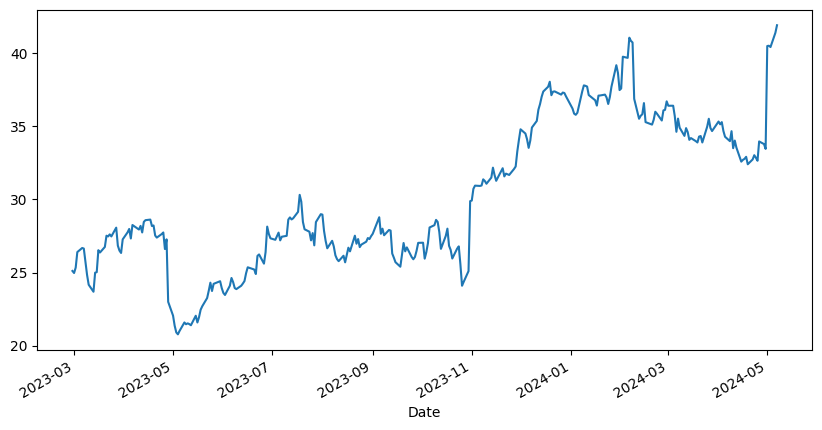

In [38]:
stock_close_data.plot(figsize=(10,5))

In [17]:
# df_close_data.plot(figsize=(10,5))

<Axes: xlabel='Date'>

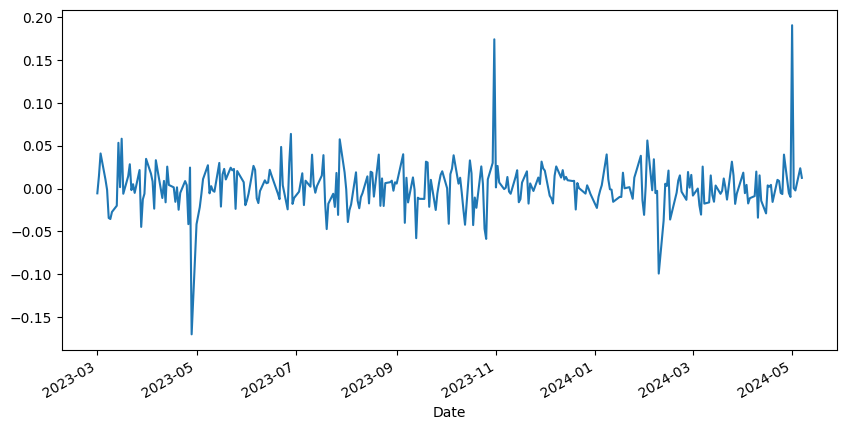

In [18]:
log_returns.plot(figsize=(10,5))
# df_log_returns.plot(figsize=(10,5))

In [19]:
u = log_returns.mean()
# u = df_log_returns.mean()
print(type(u))
print(u)

<class 'numpy.float64'>
0.0017124403540757325


In [20]:
var = log_returns.var()
# var = df_log_returns.var()
print(type(var))
print(var)

<class 'numpy.float64'>
0.0007837052518430838


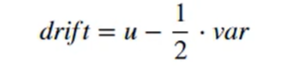
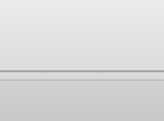

In [21]:
drift = u - 1/2 * var 
print(type(drift))
print(drift)

<class 'numpy.float64'>
0.0013205877281541906


In [22]:
stdev = log_returns.std()
print(stdev)

0.027994736145266378


brownian motion 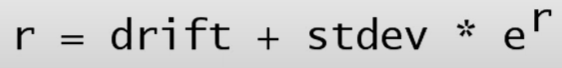

In [23]:
type(drift)
type(stdev)

numpy.float64

In [24]:
np.array(drift)


array(0.00132059)

In [25]:
norm.ppf(0.95) #percent chance of occuring
x = np.random.rand(10,2)
print(x)
norm.ppf(x)

[[0.7798417  0.7674976 ]
 [0.76590794 0.14823138]
 [0.16478025 0.91127971]
 [0.39657458 0.73909761]
 [0.14816427 0.38569117]
 [0.02057541 0.06918105]
 [0.10136123 0.08550585]
 [0.26132244 0.66995062]
 [0.49585187 0.1791792 ]
 [0.66725419 0.66676921]]


array([[ 0.77165868,  0.73063061],
       [ 0.72543679, -1.04404892],
       [-0.97499951,  1.34867751],
       [-0.26222347,  0.64056588],
       [-1.04433907, -0.29056722],
       [-2.04200715, -1.48191802],
       [-1.27383343, -1.36896024],
       [-0.63927371,  0.43977681],
       [-0.010398  , -0.91849762],
       [ 0.43234372,  0.43100934]])

In [26]:
z = norm.ppf(np.random.rand(10,2)) # z corecponds to the distance between the mean and the events, expressed as the number of standard deviations
z

array([[ 5.15189632e-01, -2.85414448e+00],
       [-6.72941643e-01,  3.60238046e-01],
       [-1.50020176e+00, -6.96362663e-01],
       [ 5.14719721e-01, -1.11943119e+00],
       [ 1.41761751e+00,  1.10267698e+00],
       [-8.47289893e-01,  7.92906172e-01],
       [-1.05109792e+00,  1.29773443e+00],
       [ 2.84238212e-01,  8.61137664e-01],
       [-1.41512432e+00, -4.41649071e-01],
       [ 2.38920520e-03,  1.53749400e+00]])

In [27]:
t_intervals = 10 #forcasting the stock price of future 1000 days
iterations = 100 #series of future stock predictions

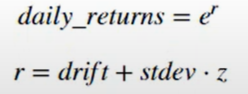

In [28]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.08271363, 1.01841505, 1.02208652, 1.04555642, 1.00705585,
        0.99096425, 1.03110549, 1.02397193, 0.98275906, 0.97772158,
        1.0074903 , 0.99515355, 0.96087858, 0.97363096, 1.00675389,
        0.9992627 , 1.01524138, 1.01827003, 1.03087911, 1.02505092,
        0.96796486, 0.94042575, 0.9983138 , 0.98738802, 1.04246983,
        0.96862643, 0.97140094, 1.04524719, 0.94884306, 0.96070064,
        1.00418223, 1.01103654, 0.98899121, 1.00530654, 0.94968175,
        1.01468222, 0.98730743, 1.00437437, 1.05049185, 1.00903337,
        1.01011398, 1.03670876, 0.99512675, 1.04132764, 0.97237496,
        1.0141679 , 1.00279221, 0.98500774, 1.01618934, 0.96302787,
        1.01709567, 0.99569272, 0.99676999, 1.01104611, 1.08064083,
        1.00113725, 1.04070443, 0.98497318, 0.99575551, 1.01992905,
        1.02027418, 0.977694  , 1.05742295, 1.00307337, 1.04436616,
        1.03505018, 0.96827851, 1.00470376, 1.00888809, 0.9982548 ,
        1.0062232 , 1.01112702, 0.99193195, 0.97

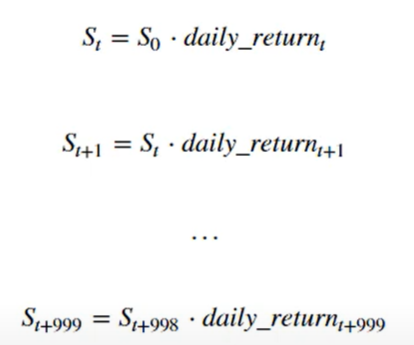

In [29]:
S0 = stock_close_data.iloc[-1]
S0

41.900001525878906

In [30]:
price_list = np.zeros_like(daily_returns)
price_list


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [31]:
price_list[0] = S0
price_list

array([[41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.9

In [32]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

price_list

array([[41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.90000153, 41.90000153,
        41.90000153, 41.90000153, 41.90000153, 41.9

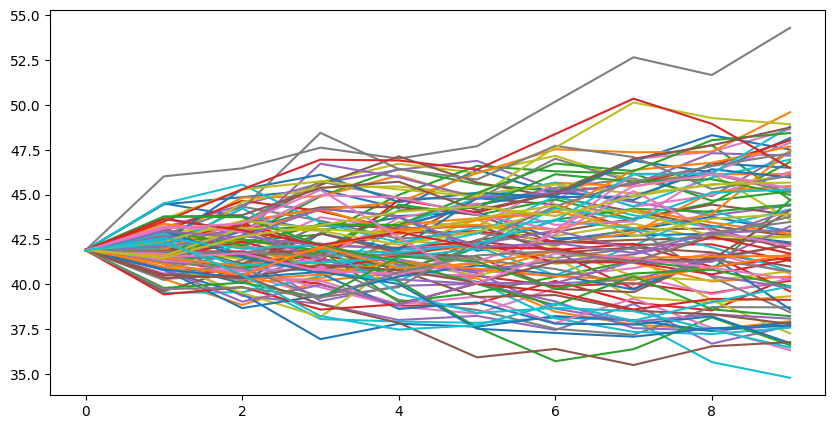

In [33]:
plt.figure(figsize=(10,5))
plt.plot(price_list)